# Decision Tree

In [1]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score

In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head(2)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


## Label Encoding

In [3]:
label_encode = LabelEncoder()
y_encode = label_encode.fit_transform(data['family_history_with_overweight'])
y_encode

array([1, 1, 1, ..., 1, 1, 1])

In [4]:
X = data[['Weight']]
y = y_encode
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# print(y_train, y_test)

In [5]:
data.family_history_with_overweight.value_counts(), len(data)

(family_history_with_overweight
 yes    1726
 no      385
 Name: count, dtype: int64,
 2111)

## Decision Tree - Gini Impurity

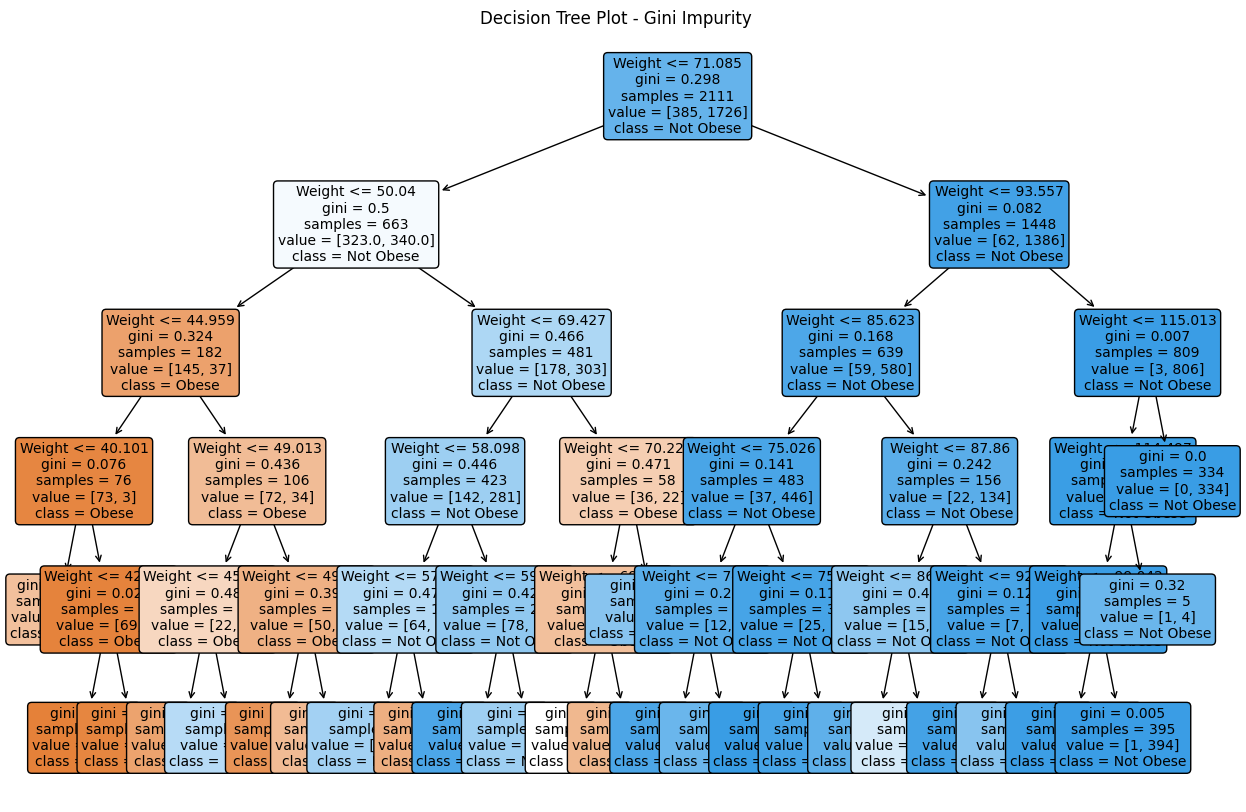

In [6]:
gini_classify = DecisionTreeClassifier(random_state=10, min_samples_leaf=5, max_depth=5)
# 
gini_classify.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(gini_classify, feature_names=X.columns,class_names = ['Obese', 'Not Obese'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Plot - Gini Impurity")
plt.show()

## Decision Tree - Entropy

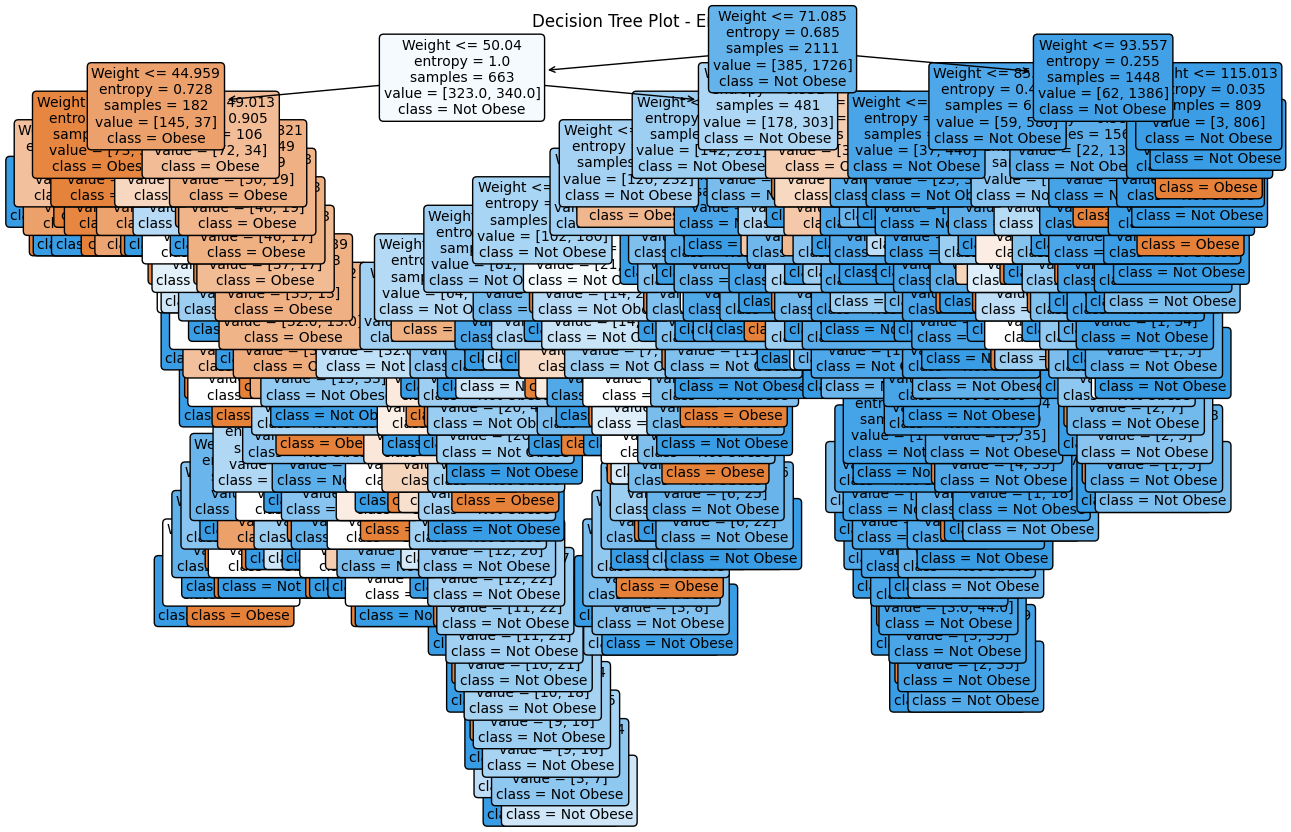

In [7]:
classify = DecisionTreeClassifier(random_state=10, criterion='entropy')
# , min_samples_leaf=5, max_depth=5, 
classify.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(classify, feature_names=X.columns,class_names = ['Obese', 'Not Obese'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Plot - Entropy")
plt.show()

In [8]:
y_pred = gini_classify.predict(x_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
score, matrix

(0.8936170212765957,
 array([[ 31,  37],
        [  8, 347]], dtype=int64))

In [9]:
y_predict = classify.predict(x_test)
score_2 = accuracy_score(y_test, y_predict)
matrix_2 = confusion_matrix(y_test, y_pred)
score_2, matrix_2

(0.9267139479905437,
 array([[ 31,  37],
        [  8, 347]], dtype=int64))

## Hyperparameter Tuning - max_depth

In [10]:
r2_test_score = []
r2_train_score = []
max_depth = list(range(1, 25))
for depth in max_depth:
    reg = DecisionTreeClassifier(max_depth=depth, random_state=10)
    reg.fit(x_train, y_train)
    score = reg.score(x_test, y_test)
    r2_test_score.append(score)
    score = reg.score(x_train, y_train)
    r2_train_score.append(score)
score_list = dict(zip(r2_test_score, max_depth))
score_list

{0.7966903073286052: 1,
 0.8888888888888888: 6,
 0.8936170212765957: 4,
 0.8841607565011821: 5,
 0.8770685579196218: 7,
 0.8676122931442081: 12,
 0.8699763593380615: 9,
 0.8628841607565012: 11,
 0.8534278959810875: 13,
 0.851063829787234: 14,
 0.8439716312056738: 24}

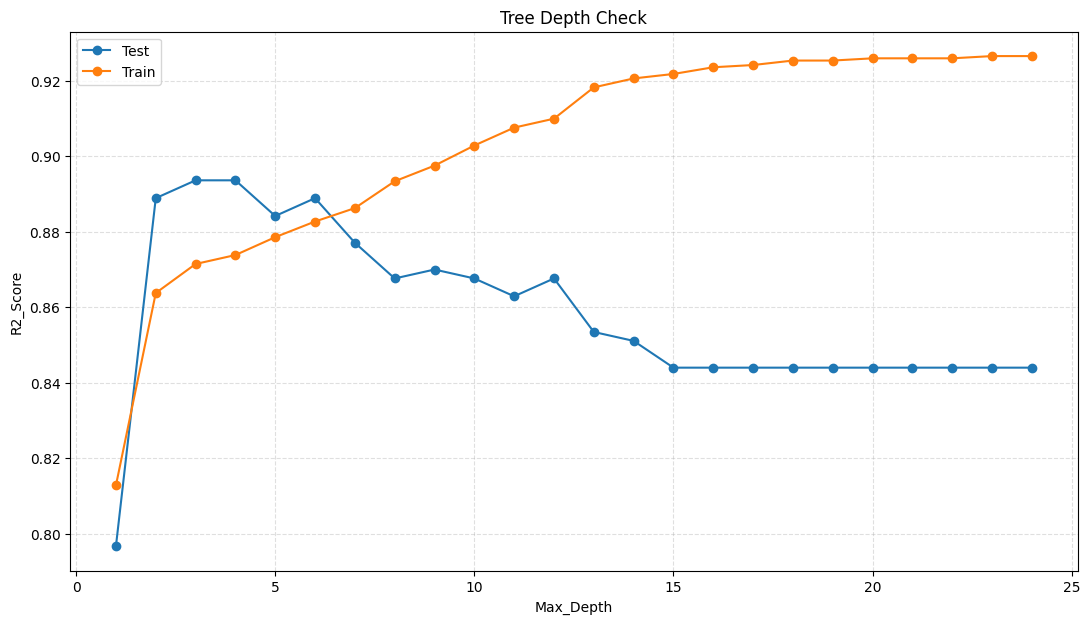

In [11]:
plt.figure(figsize=(13, 7))
plt.plot(max_depth, r2_test_score, marker='o', label='Test')
plt.plot(max_depth, r2_train_score, marker='o', label='Train')
plt.plot()
plt.title('Tree Depth Check')
plt.xlabel('Max_Depth')
plt.ylabel('R2_Score')
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.legend()
plt.show()

## Random Search and Grid Search

In [12]:


param_grid = {'max_depth': [1, 4, 5, 10, 20, None],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 4]
             }
classi = DecisionTreeClassifier(random_state=10)
rndmSearch = RandomizedSearchCV(classi, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rndmSearch.fit(x_train, y_train)
print(rndmSearch.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}


In [13]:
grid = GridSearchCV(classi, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=10)
0.8673063754323742


In [14]:
cv_res = pd.DataFrame(grid.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,0.003938,0.000350,0.001765,0.000462,10,4,5,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.869822,0.852071,0.866864,0.866469,0.881306,0.867306,0.009331,1
46,0.004050,0.000410,0.002984,0.001966,10,4,10,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.869822,0.852071,0.866864,0.866469,0.881306,0.867306,0.009331,1
44,0.004110,0.000379,0.001907,0.000497,10,4,2,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.869822,0.852071,0.866864,0.866469,0.881306,0.867306,0.009331,1
15,0.003310,0.000670,0.001402,0.000487,4,1,20,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.852071,0.866864,0.863905,0.872404,0.875371,0.866123,0.008098,4
23,0.003516,0.000435,0.001915,0.000487,4,4,20,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.857988,0.866864,0.860947,0.869436,0.875371,0.866121,0.006165,5


## Cross Validation

In [15]:
model = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf=4, max_depth= 10)

kf = KFold(n_splits=5, shuffle=True, random_state=10)
scores = cross_val_score(model, X, y,scoring='accuracy', cv=kf)

In [16]:
for fold, score in enumerate(scores):
    print(f"KFold {fold+1}: {score}")
     
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

KFold 1: 0.8652482269503546
KFold 2: 0.8672985781990521
KFold 3: 0.8601895734597157
KFold 4: 0.8838862559241706
KFold 5: 0.8649289099526066
Mean accuracy: 0.86831030889718
Standard deviation: 0.008128840919957475


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
score = cross_val_score(model,X,y, cv=5, scoring='accuracy')
score

array([0.59810875, 0.70853081, 0.8957346 , 0.98341232, 0.86018957])